In [1]:
import pandas as pd

In [2]:
ORIGINAL_DIR = "Original-Data/"
ANALYSIS_DIR = "Analysis-Data/"

In [3]:
df = pd.read_csv(f"{ORIGINAL_DIR}measurements-out.csv", nrows=10)
df.head()

Captured Time   Latitude  Longitude  Value Unit  \
0  2021-03-14 01:59:55  42.106730 -71.712807     14  cpm   
1  2021-03-14 01:59:30   1.809340  41.235100     33  cpm   
2  2021-03-14 01:28:59  41.259708 -73.823212     14  cpm   
3  2021-03-14 01:48:59  41.259708 -73.823212     13  cpm   
4  2021-03-14 01:18:59  41.259708 -73.823212     14  cpm   

                    Location Name  Device ID  \
0  74 Barnett Rd, Sutton,MA 01590         19   
1                             NaN        233   
2                             NaN     330302   
3                             NaN     330302   
4                             NaN     330302   

                             MD5Sum  Height            Surface  Radiation  \
0  0c501c6cf1064311d5bd940d839d955d       0  Concrete Basement        NaN   
1  50fee0de5448d8d7d0ad63426b54c7f1      66                NaN        NaN   
2  96208ab6252016cd58a0e5d489a20f7d     130                NaN        NaN   
3  72af8d6ac8dfdaf9f739160cdb6bca88     130                NaN        NaN   
4  4dd670bd97422cdf0625a9d41db6c179     130                NaN        NaN   

                Uploaded Time  Loader ID  
0  2021-03-14 01:59:55.024864        NaN  
1  2021-03-14 01:59:31.149397        NaN  
2  2021-03-14 01:59:25.670692        NaN  
3  2021-03-14 01:59:25.669101        NaN  
4  2021-03-14 01:59:25.654735        NaN

In [4]:
df = pd.read_csv(f"{ORIGINAL_DIR}measurements-out.csv", usecols=[0, 1, 2, 3, 4])

In [5]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  160212270


In [6]:
df.head()

Captured Time   Latitude  Longitude  Value Unit
0  2021-03-14 01:59:55  42.106730 -71.712807   14.0  cpm
1  2021-03-14 01:59:30   1.809340  41.235100   33.0  cpm
2  2021-03-14 01:28:59  41.259708 -73.823212   14.0  cpm
3  2021-03-14 01:48:59  41.259708 -73.823212   13.0  cpm
4  2021-03-14 01:18:59  41.259708 -73.823212   14.0  cpm

In [7]:
# Drop any NA
df.dropna(axis=0, how='any', inplace=True)

In [8]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  160118607


In [9]:
df.head()

Captured Time   Latitude  Longitude  Value Unit
0  2021-03-14 01:59:55  42.106730 -71.712807   14.0  cpm
1  2021-03-14 01:59:30   1.809340  41.235100   33.0  cpm
2  2021-03-14 01:28:59  41.259708 -73.823212   14.0  cpm
3  2021-03-14 01:48:59  41.259708 -73.823212   13.0  cpm
4  2021-03-14 01:18:59  41.259708 -73.823212   14.0  cpm

In [10]:
pd.unique(df.Unit) 

array(['cpm', 'status', 'celcius', 'usv', '211', 'uSv/hr', 'CPM',
       'Inspector', 'HUMD%', 'PM10', 'PM2.5', 'PM1', 'TEMPC', 'usv/hr',
       'NOXppm', 'pm2.5', 'DeviceType2', 'DeviceType1', 'uSv/h', 'uSv',
       'Cpm', ' cpm', 'microsievert', '1', '0', 'RSSI'], dtype=object)

In [11]:
df[df.Unit == 'cpm'].shape[0]

146734917

In [12]:
df[df.Unit == 'usv'].shape[0]

329584

In [13]:
df[df.Unit == 'uSv/hr'].shape[0]

11

In [14]:
df[df.Unit == 'CPM'].shape[0]

291

In [15]:
df[df.Unit == 'usv/hr'].shape[0]

43

In [16]:
df[df.Unit == 'uSv/h'].shape[0]

43

In [17]:
df[df.Unit == 'uSv'].shape[0]

14

In [18]:
df[df.Unit == 'Cpm'].shape[0]

55

In [19]:
df[df.Unit == ' cpm'].shape[0]

10043

In [20]:
df[df.Unit == 'microsievert'].shape[0]

30096

In [21]:
# Keeping only cpm (counts per minutes)
df = df[df.Unit == 'cpm']

In [22]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  146734917


In [23]:
df.head()

Captured Time   Latitude  Longitude  Value Unit
0  2021-03-14 01:59:55  42.106730 -71.712807   14.0  cpm
1  2021-03-14 01:59:30   1.809340  41.235100   33.0  cpm
2  2021-03-14 01:28:59  41.259708 -73.823212   14.0  cpm
3  2021-03-14 01:48:59  41.259708 -73.823212   13.0  cpm
4  2021-03-14 01:18:59  41.259708 -73.823212   14.0  cpm

In [24]:
# Renaming columns
df.columns = ['datetime', 'latitude', 'longitude', 'radiation', 'unit']

In [25]:
df.head()

datetime   latitude  longitude  radiation unit
0  2021-03-14 01:59:55  42.106730 -71.712807       14.0  cpm
1  2021-03-14 01:59:30   1.809340  41.235100       33.0  cpm
2  2021-03-14 01:28:59  41.259708 -73.823212       14.0  cpm
3  2021-03-14 01:48:59  41.259708 -73.823212       13.0  cpm
4  2021-03-14 01:18:59  41.259708 -73.823212       14.0  cpm

In [26]:
# Convert cpm to µSv/h
# http://safecast.org/tilemap/methodology.html
df.radiation = df.radiation / 350

In [27]:
df.head()

datetime   latitude  longitude  radiation unit
0  2021-03-14 01:59:55  42.106730 -71.712807   0.040000  cpm
1  2021-03-14 01:59:30   1.809340  41.235100   0.094286  cpm
2  2021-03-14 01:28:59  41.259708 -73.823212   0.040000  cpm
3  2021-03-14 01:48:59  41.259708 -73.823212   0.037143  cpm
4  2021-03-14 01:18:59  41.259708 -73.823212   0.040000  cpm

In [28]:
# Keep only positive values
df = df[df.radiation > 0]

In [29]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084949


In [30]:
df.drop(df.columns.difference(['datetime','latitude', 'longitude','radiation']), 1, inplace=True)

In [31]:
df.head()

datetime   latitude  longitude  radiation
0  2021-03-14 01:59:55  42.106730 -71.712807   0.040000
1  2021-03-14 01:59:30   1.809340  41.235100   0.094286
2  2021-03-14 01:28:59  41.259708 -73.823212   0.040000
3  2021-03-14 01:48:59  41.259708 -73.823212   0.037143
4  2021-03-14 01:18:59  41.259708 -73.823212   0.040000

In [32]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084949


**Validate latitude and longitude**

In [33]:
lat = df["latitude"]
max_lat = lat.max()
min_lat = lat.min()
print(max_lat)
print(min_lat)

90.0
-90.0


In [34]:
lon = df["longitude"]
max_lon = lon.max()
min_lon = lon.min()
print(max_lon)
print(min_lon)

179.998746666667
-179.998601666667


In [35]:
df.to_csv(f"{ANALYSIS_DIR}measurements-out-2903-00.csv", index=False)

**Part 2**

In [2]:
import pandas as pd
import numpy as np

In [3]:
ORIGINAL_DIR = "../Original-Data/"
ANALYSIS_DIR = "../Analysis-Data/"

In [4]:
dtypes = {'latitude': np.float32, 'longitude': np.float32, 'radiation': np.float32}

In [5]:
df = pd.read_csv(f"{ANALYSIS_DIR}measurements-out-2903-00.csv", dtype=dtypes)
df.head()

datetime   latitude  longitude  radiation
0  2021-03-14 01:59:55  42.106731 -71.712807   0.040000
1  2021-03-14 01:59:30   1.809340  41.235100   0.094286
2  2021-03-14 01:28:59  41.259708 -73.823212   0.040000
3  2021-03-14 01:48:59  41.259708 -73.823212   0.037143
4  2021-03-14 01:18:59  41.259708 -73.823212   0.040000

In [6]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084949


In [7]:
df['datetime'].min()

'0019-08-23 22:48:03'

In [8]:
df['datetime'].max()

'6017-02-17 09:54:14'

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [10]:
df['datetime'].min()

Timestamp('1970-01-01 00:01:45')

In [11]:
df['datetime'].max()

Timestamp('2080-01-12 21:54:49')

In [12]:
# Drop any NA
df.dropna(axis=0, how='any', inplace=True)

In [13]:
df.head()

datetime   latitude  longitude  radiation
0 2021-03-14 01:59:55  42.106731 -71.712807   0.040000
1 2021-03-14 01:59:30   1.809340  41.235100   0.094286
2 2021-03-14 01:28:59  41.259708 -73.823212   0.040000
3 2021-03-14 01:48:59  41.259708 -73.823212   0.037143
4 2021-03-14 01:18:59  41.259708 -73.823212   0.040000

In [14]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084932


In [16]:
df['datetime'] = pd.to_datetime(df['datetime']).dt.date

In [17]:
print('Number of measurements: ', df.shape[0])
df.head()

Number of measurements:  145084932


datetime   latitude  longitude  radiation
0  2021-03-14  42.106731 -71.712807   0.040000
1  2021-03-14   1.809340  41.235100   0.094286
2  2021-03-14  41.259708 -73.823212   0.040000
3  2021-03-14  41.259708 -73.823212   0.037143
4  2021-03-14  41.259708 -73.823212   0.040000

In [18]:
df = df[df.datetime < pd.to_datetime('2021-03-15')]

In [22]:
df['datetime'].min()

datetime.date(1970, 1, 1)

In [23]:
print('Number of measurements: ', df.shape[0])
df.head()

Number of measurements:  145066258


datetime   latitude  longitude  radiation
0  2021-03-14  42.106731 -71.712807   0.040000
1  2021-03-14   1.809340  41.235100   0.094286
2  2021-03-14  41.259708 -73.823212   0.040000
3  2021-03-14  41.259708 -73.823212   0.037143
4  2021-03-14  41.259708 -73.823212   0.040000

In [24]:
df.to_csv(f"{ANALYSIS_DIR}measurements-out-2903-01.csv", index=False)

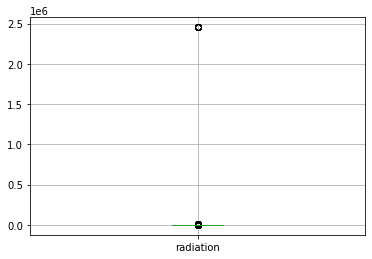

In [25]:
boxplot = df.boxplot(column=['radiation'])

In [26]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['radiation'].quantile(.25)
Q3 = df['radiation'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['radiation'].between(q1, q3)]

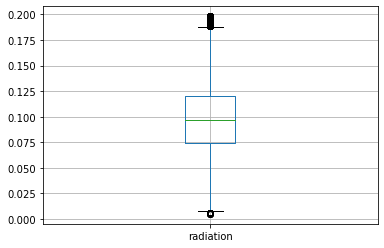

In [27]:
boxplot = df.boxplot(column=['radiation'])

In [28]:
print('Number of measurements: ', df.shape[0])
df.head()

Number of measurements:  135786902


datetime   latitude  longitude  radiation
0  2021-03-14  42.106731 -71.712807   0.040000
1  2021-03-14   1.809340  41.235100   0.094286
2  2021-03-14  41.259708 -73.823212   0.040000
3  2021-03-14  41.259708 -73.823212   0.037143
4  2021-03-14  41.259708 -73.823212   0.040000

In [29]:
df['radiation'].min()

0.004942857

In [31]:
df['radiation'].max()

0.19828571

In [32]:
df.to_csv(f"{ANALYSIS_DIR}measurements-out-2903-q1q3.csv", index=False)

**Visualization**

In [33]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend
import warnings
warnings.filterwarnings('ignore')

from bokeh.io import output_notebook, show

In [34]:
plot_width  = int(800)
plot_height = int(plot_width//1.2)

In [35]:
def draw_map(df, plot_width, plot_height, colors, agg_func, interp, background_col):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
    agg = cvs.points(df, 'longitude', 'latitude',  agg_func('radiation'))
    img = tf.shade(agg, cmap=colors, how=interp)
    return tf.set_background(img, color=background_col)

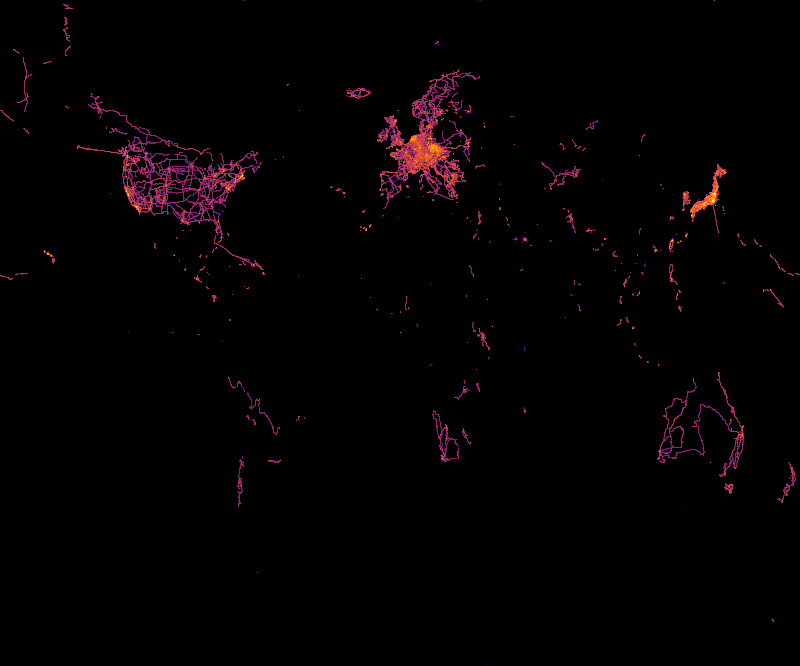

In [36]:
img = draw_map(df, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [38]:
x_min_jpn, y_min_jpn, x_max_jpn, y_max_jpn = 128.03, 30.22, 148.65, 45.83
df_jpn = df[(df.longitude > x_min_jpn) & (df.longitude < x_max_jpn) & (df.latitude > y_min_jpn) & (df.latitude < y_max_jpn)]

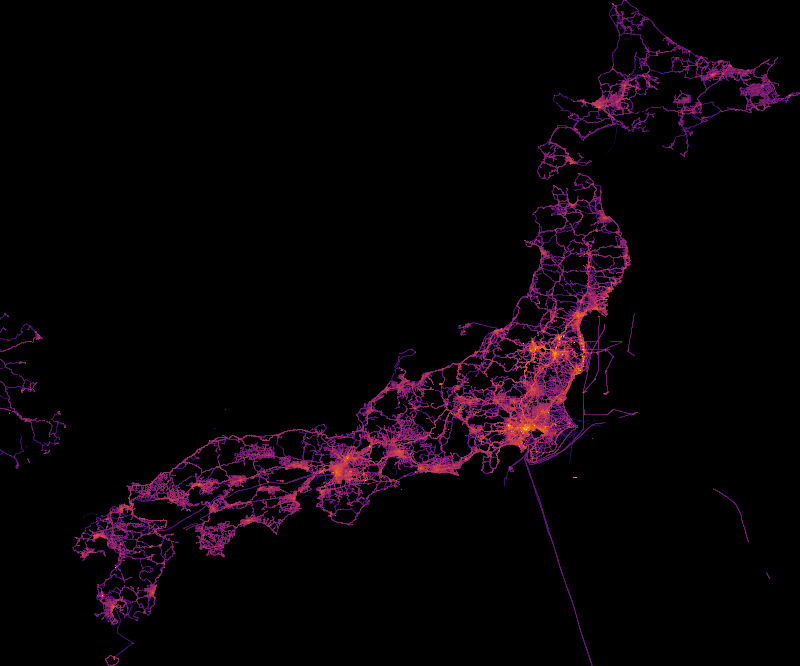

In [39]:
img = draw_map(df_jpn, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [42]:
x_min_fk, y_min_fk, x_max_fk, y_max_fk = 140.0166, 37.0047, 141.2251, 38.195
df_fk = df[(df.longitude > x_min_fk) & (df.longitude < x_max_fk) & (df.latitude > y_min_fk) & (df.latitude < y_max_fk)]

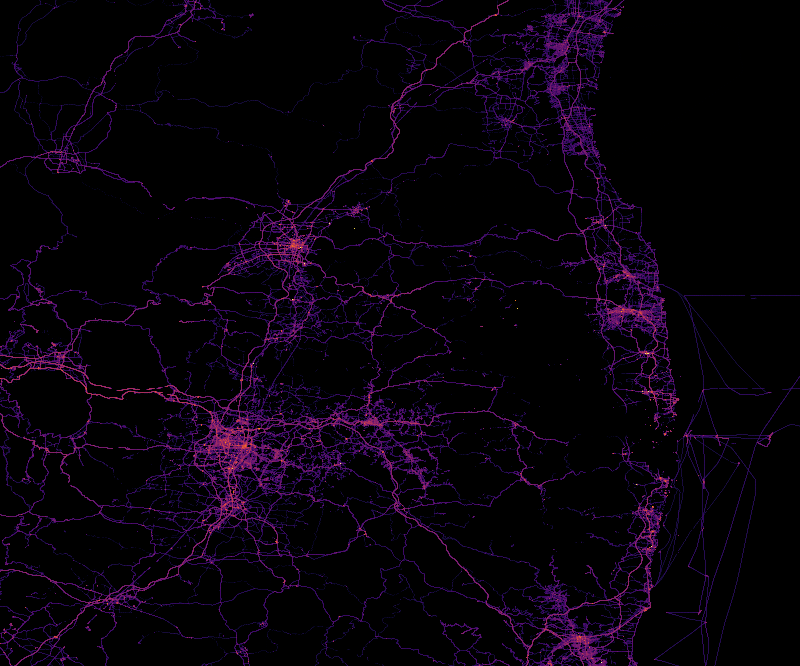

In [43]:
img = draw_map(df_fk, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

**Part 3**

In [18]:
import pandas as pd
import numpy as np

In [19]:
ORIGINAL_DIR = "../Original-Data/"
ANALYSIS_DIR = "../Analysis-Data/"

In [20]:
dtypes = {'latitude': np.float32, 'longitude': np.float32, 'radiation': np.float32}

In [21]:
df = pd.read_csv(f"{ANALYSIS_DIR}measurements-out-2903-01.csv", dtype=dtypes)
df.head()

datetime   latitude  longitude  radiation
0  2021-03-14  42.106731 -71.712807   0.040000
1  2021-03-14   1.809340  41.235100   0.094286
2  2021-03-14  41.259708 -73.823212   0.040000
3  2021-03-14  41.259708 -73.823212   0.037143
4  2021-03-14  41.259708 -73.823212   0.040000

In [33]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['radiation'].quantile(.25)
Q3 = df['radiation'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)
Q4 = df['radiation'].quantile(0.995)

In [34]:
df = df[df['radiation'].between(q1, Q4)]

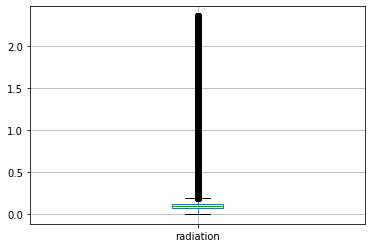

In [6]:
boxplot = df.boxplot(column=['radiation'])

In [35]:
print('Number of measurements: ', df.shape[0])
df.head()

Number of measurements:  144315087


datetime   latitude  longitude  radiation
0  2021-03-14  42.106731 -71.712807   0.040000
1  2021-03-14   1.809340  41.235100   0.094286
2  2021-03-14  41.259708 -73.823212   0.040000
3  2021-03-14  41.259708 -73.823212   0.037143
4  2021-03-14  41.259708 -73.823212   0.040000

In [36]:
df['radiation'].min()

0.004942857

In [37]:
df['radiation'].max()

2.3542857

In [46]:
df.to_csv(f"{ANALYSIS_DIR}measurements-out-2903-q1-995.csv", index=False)

**Visualization**

In [38]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend
import warnings
warnings.filterwarnings('ignore')

from bokeh.io import output_notebook, show

In [39]:
plot_width  = int(800)
plot_height = int(plot_width//1.2)

In [40]:
def draw_map(df, plot_width, plot_height, colors, agg_func, interp, background_col):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
    agg = cvs.points(df, 'longitude', 'latitude',  agg_func('radiation'))
    img = tf.shade(agg, cmap=colors, how=interp)
    return tf.set_background(img, color=background_col)

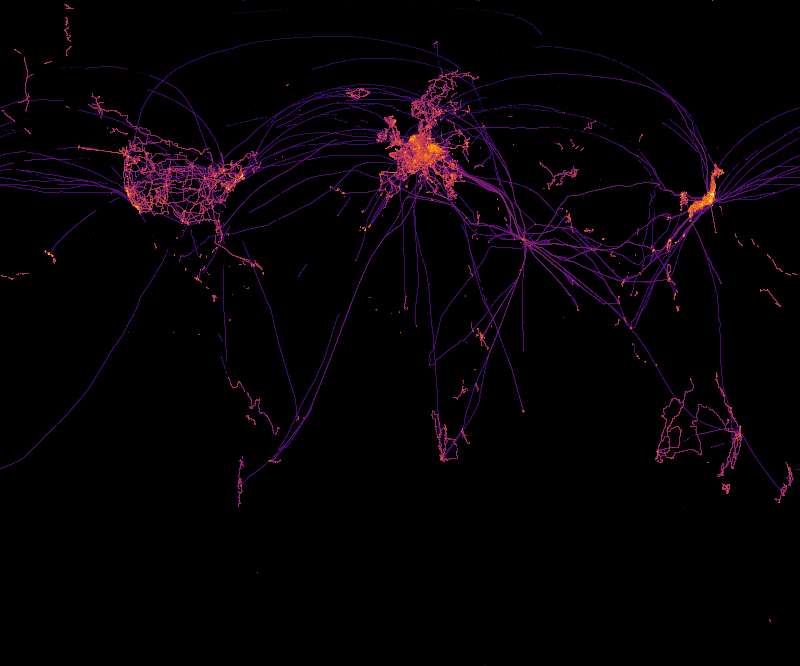

In [41]:
img = draw_map(df, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [42]:
x_min_jpn, y_min_jpn, x_max_jpn, y_max_jpn = 128.03, 30.22, 148.65, 45.83
df_jpn = df[(df.longitude > x_min_jpn) & (df.longitude < x_max_jpn) & (df.latitude > y_min_jpn) & (df.latitude < y_max_jpn)]

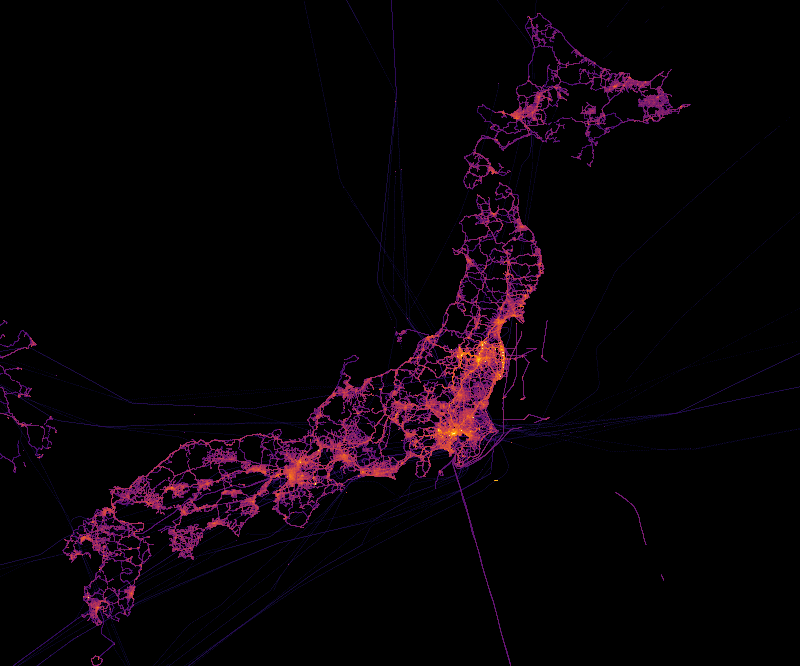

In [43]:
img = draw_map(df_jpn, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [44]:
x_min_fk, y_min_fk, x_max_fk, y_max_fk = 140.0166, 37.0047, 141.2251, 38.195
df_fk = df[(df.longitude > x_min_fk) & (df.longitude < x_max_fk) & (df.latitude > y_min_fk) & (df.latitude < y_max_fk)]

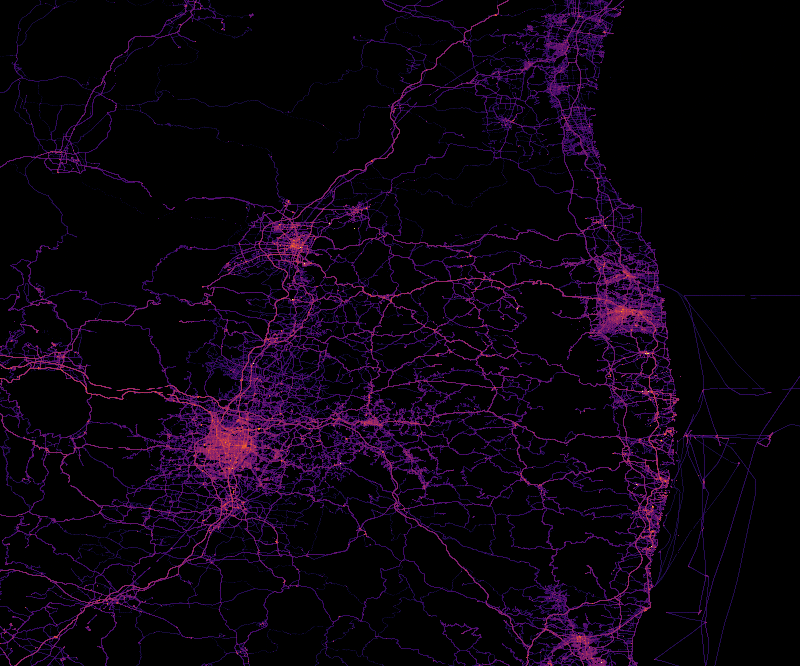

In [45]:
img = draw_map(df_fk, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

**Statistics**

In [47]:
import pandas as pd
import numpy as np

import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend
import warnings
warnings.filterwarnings('ignore')

from bokeh.io import output_notebook, show

In [48]:
ORIGINAL_DIR = "../Original-Data/"
ANALYSIS_DIR = "../Analysis-Data/"

In [49]:
dtypes = {'latitude': np.float32, 'longitude': np.float32, 'radiation': np.float32}

In [50]:
df = pd.read_csv(f"{ANALYSIS_DIR}measurements-out-2903-q1-995.csv", dtype=dtypes)
df.head()

datetime   latitude  longitude  radiation
0  2021-03-14  42.106731 -71.712807   0.040000
1  2021-03-14   1.809340  41.235100   0.094286
2  2021-03-14  41.259708 -73.823212   0.040000
3  2021-03-14  41.259708 -73.823212   0.037143
4  2021-03-14  41.259708 -73.823212   0.040000

In [51]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  144315087


In [52]:
df = df.drop_duplicates(subset=['datetime', 'latitude', 'longitude'], keep='last', ignore_index=True)
df.head()

datetime   latitude   longitude  radiation
0  2021-03-14  41.259708  -73.823212   0.108571
1  2021-03-14  41.219067  -74.005775   0.145714
2  2021-03-14  34.451954 -119.822105   0.091429
3  2021-03-14  35.664761  139.705154   0.091429
4  2021-03-14  33.448936 -117.648895   0.082857

In [53]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  68089069


In [54]:
df.to_csv(f"{ANALYSIS_DIR}measurements-unique-q1-995.csv", index=False)

In [55]:
x_min_jpn, y_min_jpn, x_max_jpn, y_max_jpn = 128.03, 30.22, 148.65, 45.83
df_jpn = df[(df.longitude > x_min_jpn) & (df.longitude < x_max_jpn) & (df.latitude > y_min_jpn) & (df.latitude < y_max_jpn)]
df_jpn.to_csv(f"{ANALYSIS_DIR}measurements-japan-q1-995.csv", index=False)

In [56]:
x_min_fk, y_min_fk, x_max_fk, y_max_fk = 140.0166, 37.0047, 141.2251, 38.195
df_fk = df[(df.longitude > x_min_fk) & (df.longitude < x_max_fk) & (df.latitude > y_min_fk) & (df.latitude < y_max_fk)]
df_fk.to_csv(f"{ANALYSIS_DIR}measurements-fukushima-q1-995.csv", index=False)

In [57]:
def draw_map(df, plot_width, plot_height, colors, agg_func, interp, background_col):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
    agg = cvs.points(df, 'longitude', 'latitude',  agg_func('radiation'))
    img = tf.shade(agg, cmap=colors, how=interp)
    return tf.set_background(img, color=background_col)

In [58]:
import requests
def get_boundingbox_country(country, output_as='boundingbox'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                             country,
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

In [59]:
import matplotlib.pyplot as plt
def create_statistics(radiation_map, country):
    coordinates = get_boundingbox_country(country)
    lat_min, lat_max, lon_min, lon_max = coordinates
    radiation_map = radiation_map[(radiation_map.longitude > lon_min) & (radiation_map.longitude < lon_max) & (radiation_map.latitude > lat_min) & (radiation_map.latitude < lat_max)]
    print("[INFO] Number of measurements:", radiation_map.shape[0])
    print("[INFO] Wait a second. We will provide detailed data in a moment.")
    radiation_map.boxplot(column=['radiation'])
    print(radiation_map.radiation.describe())
    
    plot_width  = int(600)
    plot_height = int(plot_width//1.2)
    img = draw_map(radiation_map, plot_width, plot_height, inferno, ds.count, 'log', 'black')
    return img

[INFO] Number of measurements: 24627164
[INFO] Wait a second. We will provide detailed data in a moment.
count    2.462716e+07
mean     1.358486e-01
std      1.500681e-01
min      5.714286e-03
25%      9.142857e-02
50%      1.085714e-01
75%      1.314286e-01
max      2.354286e+00
Name: radiation, dtype: float64


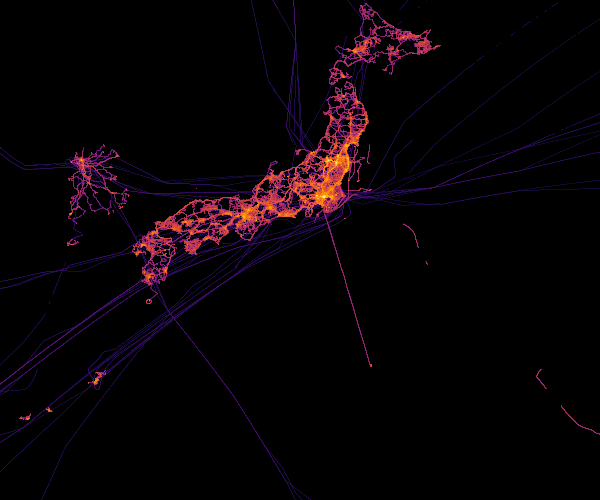

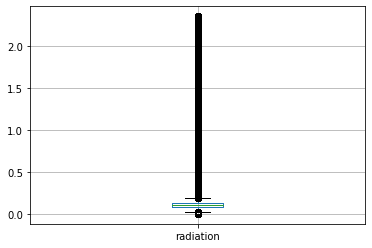

In [60]:
vis = create_statistics(df, 'Japan')
vis

[INFO] Number of measurements: 190282
[INFO] Wait a second. We will provide detailed data in a moment.
count    190282.000000
mean          0.106643
std           0.176760
min           0.011429
25%           0.074286
50%           0.088571
75%           0.102857
max           2.354286
Name: radiation, dtype: float64


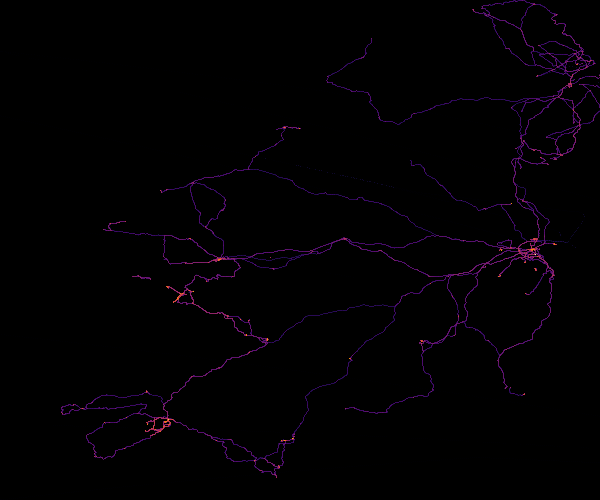

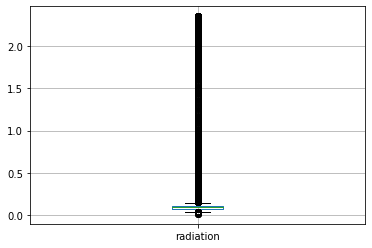

In [61]:
vis = create_statistics(df, 'Ireland')
vis

[INFO] Number of measurements: 1146330
[INFO] Wait a second. We will provide detailed data in a moment.
count    1.146330e+06
mean     1.303891e-01
std      1.530215e-01
min      5.714286e-03
25%      9.714286e-02
50%      1.171429e-01
75%      1.371429e-01
max      2.354286e+00
Name: radiation, dtype: float64


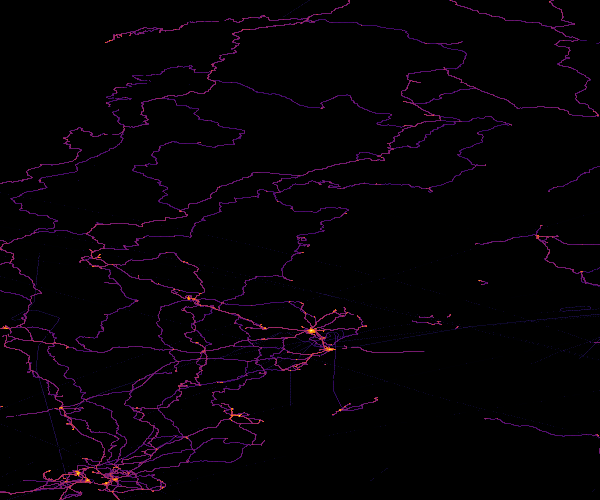

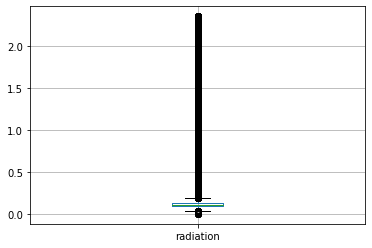

In [62]:
vis = create_statistics(df, 'Sweden')
vis

[INFO] Number of measurements: 8746767
[INFO] Wait a second. We will provide detailed data in a moment.
count    8.746767e+06
mean     1.232893e-01
std      6.284514e-02
min      5.714286e-03
25%      9.714286e-02
50%      1.142857e-01
75%      1.400000e-01
max      2.354286e+00
Name: radiation, dtype: float64


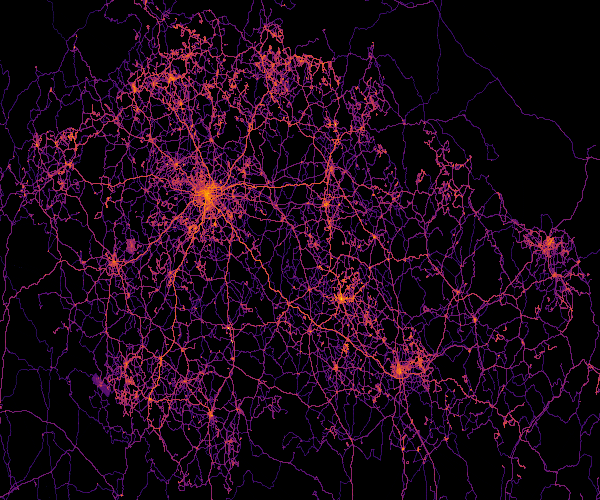

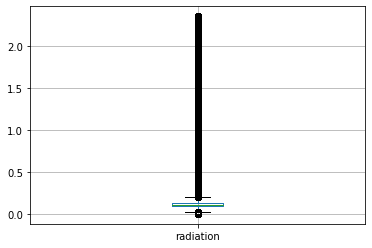

In [63]:
vis = create_statistics(df, 'Czech Republic')
vis

[INFO] Number of measurements: 138431
[INFO] Wait a second. We will provide detailed data in a moment.
count    138431.000000
mean          0.327639
std           0.473361
min           0.017143
25%           0.111429
50%           0.157143
75%           0.217143
max           2.351429
Name: radiation, dtype: float64


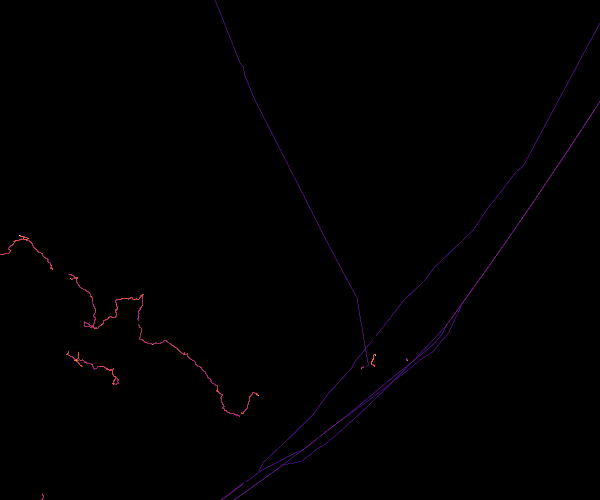

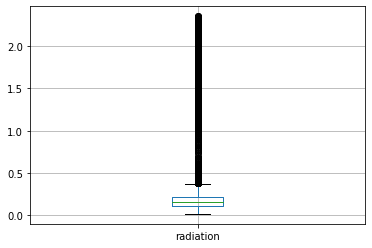

In [64]:
vis = create_statistics(df, 'Brasil')
vis

[INFO] Number of measurements: 6744387
[INFO] Wait a second. We will provide detailed data in a moment.
count    6.744387e+06
mean     1.215161e-01
std      6.050613e-02
min      5.714286e-03
25%      9.428571e-02
50%      1.142857e-01
75%      1.371429e-01
max      2.354286e+00
Name: radiation, dtype: float64


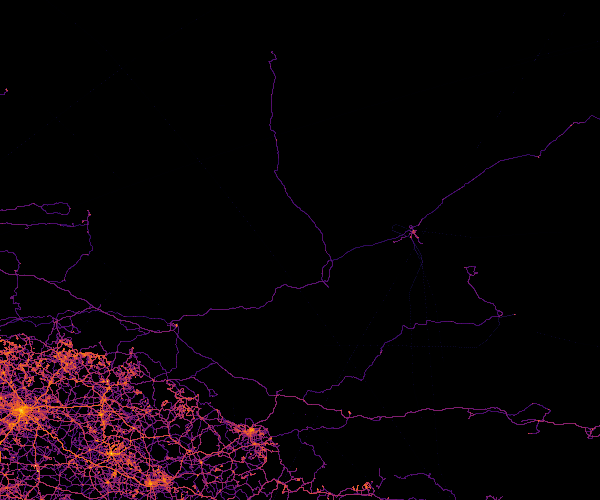

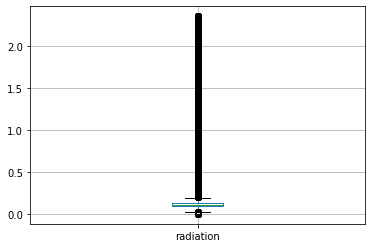

In [65]:
vis = create_statistics(df, 'Poland')
vis

[INFO] Number of measurements: 712938
[INFO] Wait a second. We will provide detailed data in a moment.
count    712938.000000
mean          0.185074
std           0.278655
min           0.008571
25%           0.094286
50%           0.114286
75%           0.145714
max           2.354286
Name: radiation, dtype: float64


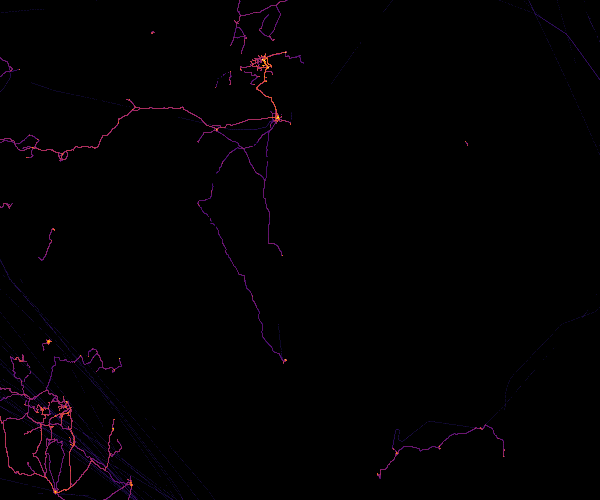

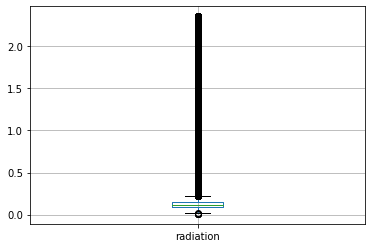

In [66]:
vis = create_statistics(df, 'Ukraine')
vis

[INFO] Number of measurements: 10854584
[INFO] Wait a second. We will provide detailed data in a moment.
count    1.085458e+07
mean     1.103967e-01
std      7.304893e-02
min      5.714286e-03
25%      8.571429e-02
50%      1.028571e-01
75%      1.228571e-01
max      2.354286e+00
Name: radiation, dtype: float64


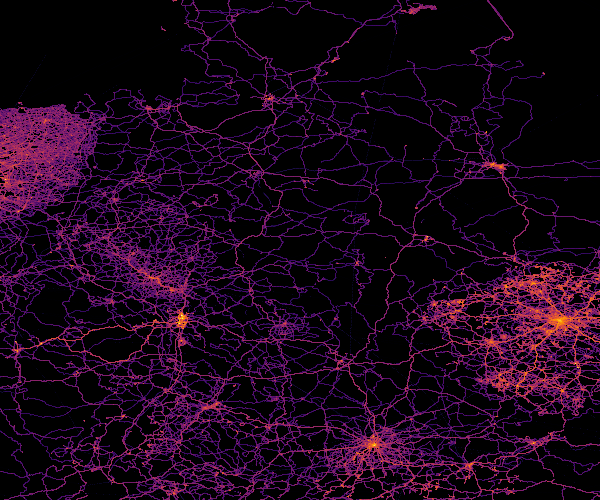

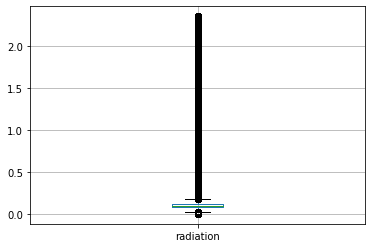

In [67]:
vis = create_statistics(df, 'Germany')
vis

[INFO] Number of measurements: 5627415
[INFO] Wait a second. We will provide detailed data in a moment.
count    5.627415e+06
mean     1.420715e-01
std      1.923283e-01
min      5.714286e-03
25%      8.857143e-02
50%      1.085714e-01
75%      1.314286e-01
max      2.354286e+00
Name: radiation, dtype: float64


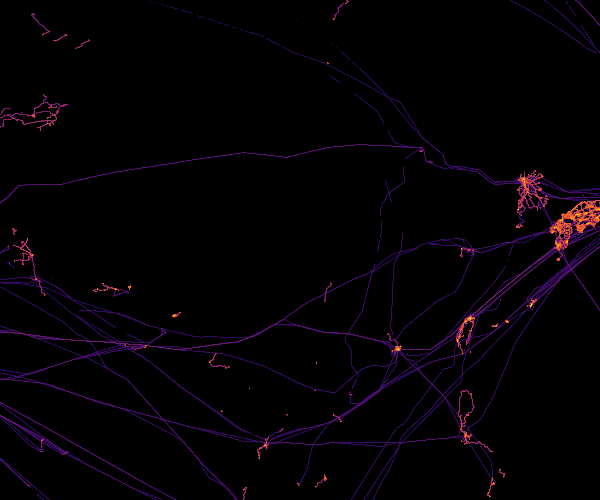

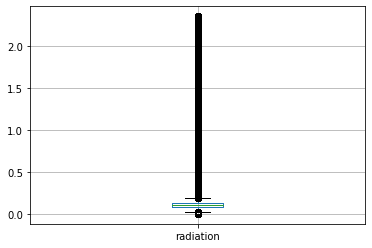

In [68]:
vis = create_statistics(df, 'China')
vis

[INFO] Number of measurements: 57392
[INFO] Wait a second. We will provide detailed data in a moment.
count    57392.000000
mean         0.358692
std          0.586875
min          0.011429
25%          0.068571
50%          0.085714
75%          0.111429
max          2.120000
Name: radiation, dtype: float64


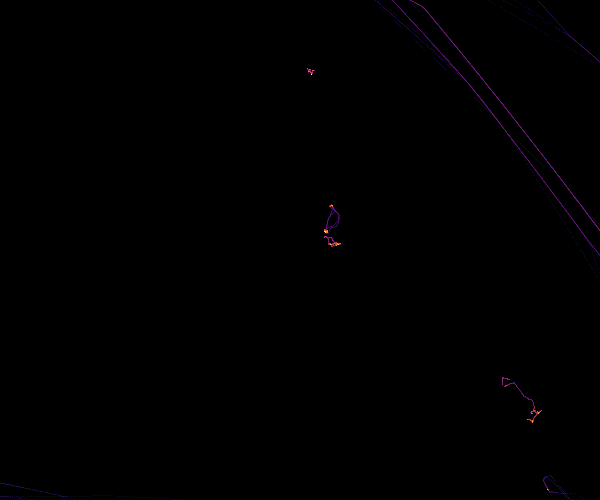

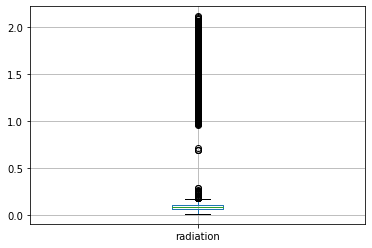

In [69]:
vis = create_statistics(df, 'Iraq')
vis

[INFO] Number of measurements: 105304
[INFO] Wait a second. We will provide detailed data in a moment.
count    105304.000000
mean          0.204578
std           0.114944
min           0.022857
25%           0.122857
50%           0.171429
75%           0.280000
max           1.602857
Name: radiation, dtype: float64


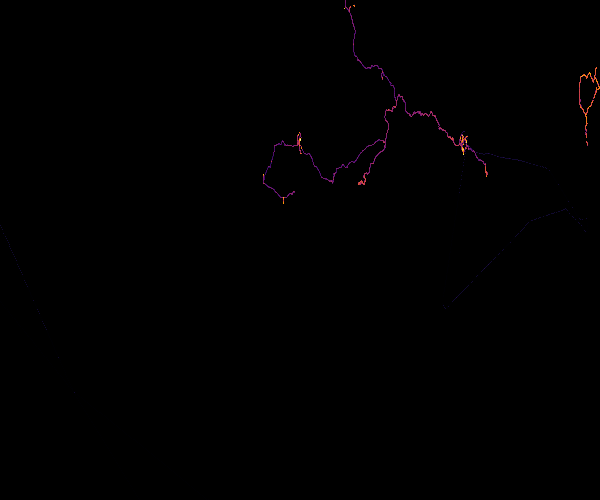

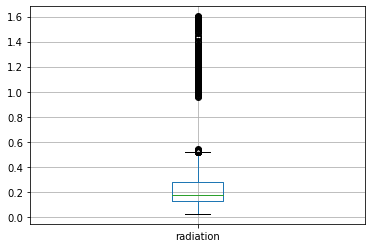

In [70]:
vis = create_statistics(df, 'Nepal')
vis

In [71]:
import matplotlib.pyplot as plt
def create_statistics_for_coordinates(radiation_map, coordinates):
    lon_min, lon_max, lat_min, lat_max = coordinates
    radiation_map = radiation_map[(radiation_map.longitude > lon_min) & (radiation_map.longitude < lon_max) & (radiation_map.latitude > lat_min) & (radiation_map.latitude < lat_max)]
    print("[INFO] Number of measurements:", radiation_map.shape[0])
    print("[INFO] Wait a second. We will provide detailed data in a moment.")
    radiation_map.boxplot(column=['radiation'])
    print(radiation_map.radiation.describe())
    
    plot_width  = int(600)
    plot_height = int(plot_width//1.2)
    img = draw_map(radiation_map, plot_width, plot_height, inferno, ds.count, 'log', 'black')
    return img

In [72]:
coordinates = {"Fukushima": [140.0166, 141.2251, 37.0047, 38.195], 
               "Netherlands": [3.10, 7.32, 50.73, 53.56],}

Fukushima

[INFO] Number of measurements: 4352731
[INFO] Wait a second. We will provide detailed data in a moment.
count    4.352731e+06
mean     2.519324e-01
std      2.793909e-01
min      5.714286e-03
25%      1.200000e-01
50%      1.600000e-01
75%      2.571429e-01
max      2.354286e+00
Name: radiation, dtype: float64


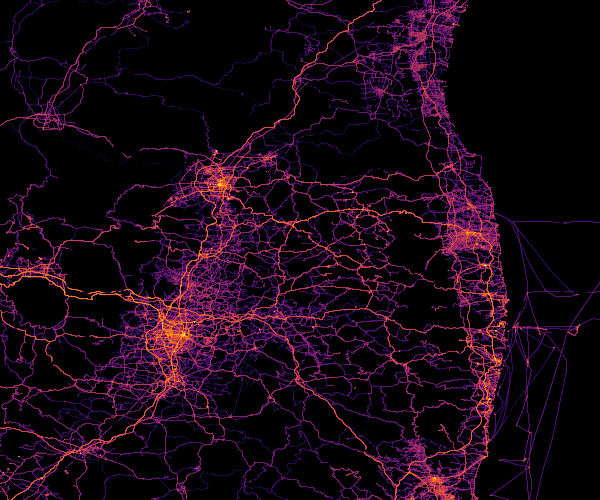

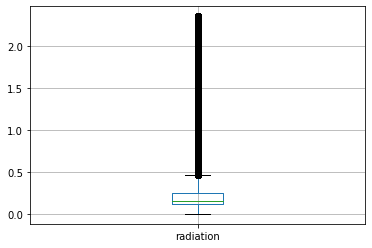

In [73]:
vis = create_statistics_for_coordinates(df, coordinates["Fukushima"])
vis

Netherlands

[INFO] Number of measurements: 2953157
[INFO] Wait a second. We will provide detailed data in a moment.
count    2.953157e+06
mean     9.211679e-02
std      5.047321e-02
min      5.714286e-03
25%      7.714286e-02
50%      8.857143e-02
75%      1.028571e-01
max      2.354286e+00
Name: radiation, dtype: float64


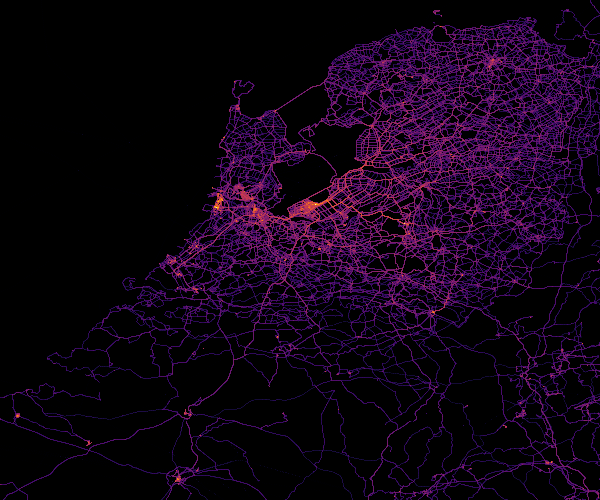

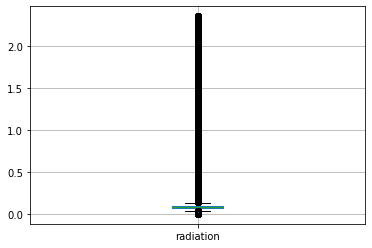

In [74]:
vis = create_statistics_for_coordinates(df, coordinates["Netherlands"])
vis